In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Завантаження даних
df = pd.read_csv("data2.csv")

# 1. Видалення непотрібних колонок
df = df.drop(columns=["id", "Unnamed: 32"])

# 2. Перетворення цільової змінної в числовий формат
df["diagnosis"] = LabelEncoder().fit_transform(df["diagnosis"])  # M → 1, B → 0

# 3. Розділення на ознаки та цільову змінну
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# 4. Поділ на навчальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Масштабування ознак
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Створення та навчання моделі SVM з RBF ядром
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svm_model.fit(X_train_scaled, y_train)

# 7. Прогноз на тестових даних
y_pred = svm_model.predict(X_test_scaled)

# 8. Оцінка моделі
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy

0.9824561403508771

In [8]:
from tabulate import tabulate
from sklearn.metrics import classification_report

# Отримання метрик у вигляді словника
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Перетворення у формат таблиці
table_data = []
for label, metrics in report_dict.items():
    if isinstance(metrics, dict):  # Фільтруємо загальні значення (accuracy)
        table_data.append([label] + [metrics["precision"], metrics["recall"], metrics["f1-score"], metrics["support"]])

# Додаємо accuracy окремо
table_data.append(["accuracy", "", "", report_dict["accuracy"], sum(y_test.value_counts())])

# Виведення таблиці
headers = ["Label", "Precision", "Recall", "F1-Score", "Support"]
table = tabulate(table_data, headers=headers, tablefmt="grid", floatfmt=".2f")
table


'+--------------+--------------------+--------------------+------------+-----------+\n| Label        | Precision          | Recall             |   F1-Score |   Support |\n+==============+====================+====================+============+===========+\n| 0            | 0.9726027397260274 | 1.0                |       0.99 |     71.00 |\n+--------------+--------------------+--------------------+------------+-----------+\n| 1            | 1.0                | 0.9534883720930233 |       0.98 |     43.00 |\n+--------------+--------------------+--------------------+------------+-----------+\n| macro avg    | 0.9863013698630136 | 0.9767441860465116 |       0.98 |    114.00 |\n+--------------+--------------------+--------------------+------------+-----------+\n| weighted avg | 0.9829367940398942 | 0.9824561403508771 |       0.98 |    114.00 |\n+--------------+--------------------+--------------------+------------+-----------+\n| accuracy     |                    |                    |      

In [9]:
import pandas as pd
from sklearn.metrics import classification_report

# Отримання метрик у вигляді словника
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Створення таблиці у вигляді DataFrame
df_report = pd.DataFrame(report_dict).transpose()

# Округлення значень до 2 знаків після коми
df_report = df_report.round(2)

# Виведення таблиці
print(df_report)


              precision  recall  f1-score  support
0                  0.97    1.00      0.99    71.00
1                  1.00    0.95      0.98    43.00
accuracy           0.98    0.98      0.98     0.98
macro avg          0.99    0.98      0.98   114.00
weighted avg       0.98    0.98      0.98   114.00


In [5]:


classification_rep


'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99        71\n           1       1.00      0.95      0.98        43\n\n    accuracy                           0.98       114\n   macro avg       0.99      0.98      0.98       114\nweighted avg       0.98      0.98      0.98       114\n'

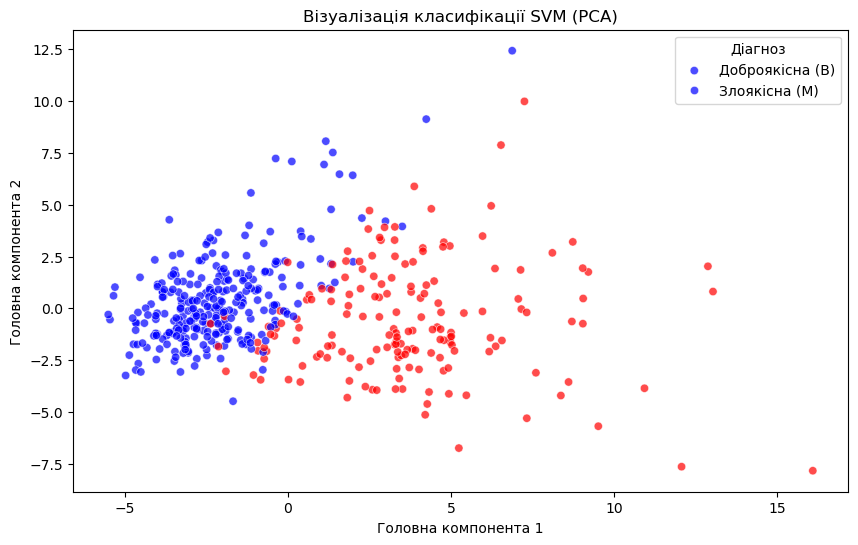

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Використовуємо PCA для зменшення вимірності до 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Візуалізація
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette=["blue", "red"], alpha=0.7)
plt.xlabel("Головна компонента 1")
plt.ylabel("Головна компонента 2")
plt.title("Візуалізація класифікації SVM (PCA)")
plt.legend(title="Діагноз", labels=["Доброякісна (B)", "Злоякісна (M)"])
plt.show()


In [11]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Створюємо та навчаємо модель SVM з лінійним ядром
svm_linear = SVC(kernel="linear", C=1.0, random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# Прогнозування
y_pred_linear = svm_linear.predict(X_test_scaled)

# Оцінка точності
accuracy = accuracy_score(y_test, y_pred_linear)
report = classification_report(y_test, y_pred_linear)

# Виведення результатів
print(f"Accuracy: {accuracy * 100:.2f}%")
print(report)


Accuracy: 95.61%
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

